In [1]:
import pandas as pd
pickle = pd.read_pickle('fingerhut_combined_grouped.pkl')

In [3]:
pickle.shape

(1665431, 8)

In [22]:
import random
random.seed(31424)
medium_pickle = pickle.sample(n=16000, random_state = 31424)

In [23]:
import mchmm as mc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
markov_chains = []

for index, row in medium_pickle.iterrows():

    sequence = row['stage']

    mc_obj = mc.MarkovChain().from_data(sequence)

    markov_chains.append(mc_obj)

In [25]:
import numpy as np
unique_states = set()
for mc in markov_chains:
    unique_states.update(mc.states)
unique_states = sorted(list(unique_states))  # Sort for consistent ordering

In [26]:
# Initialize an aggregated transition count matrix
n = len(unique_states)
aggregated_counts = np.zeros((n, n))

# Map each state to its index in the aggregated matrix
state_to_index = {state: i for i, state in enumerate(unique_states)}

for mc in markov_chains:
    # Increment counts in the aggregated matrix based on observed transitions in mc
    for i in range(len(mc.states)-1):
        from_state, to_state = mc.states[i], mc.states[i+1]
        from_index, to_index = state_to_index[from_state], state_to_index[to_state]
        aggregated_counts[from_index, to_index] += 1  # Increment count for observed transition

# Optional: Convert counts to probabilities by normalizing each row
aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)
aggregated_probs = np.nan_to_num(aggregated_probs)  # Handle division by zero for states with no outgoing transitions

/var/folders/xq/53p8ng8d1kl4qps60jfz4hdw0000gn/T/ipykernel_10654/849880191.py:16: RuntimeWarning: invalid value encountered in true_divide
  aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)


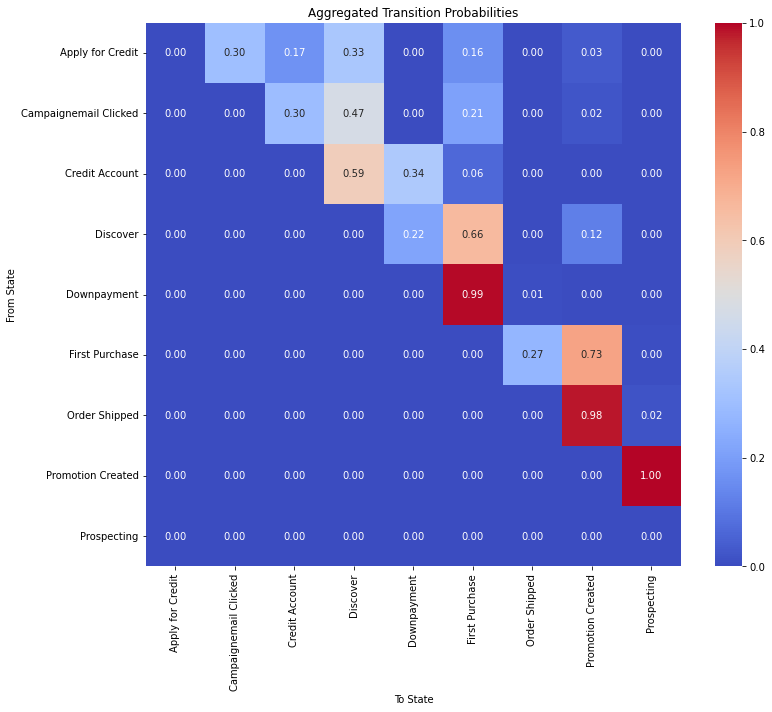

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(aggregated_probs, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=unique_states, yticklabels=unique_states)
plt.title("Aggregated Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()